In [40]:
# Célula 1: Importação de Bibliotecas e Carregamento dos Dados

# Importando a biblioteca Pandas, nosso canivete suíço para manipulação de dados.
# O 'as pd' é um apelido para não precisarmos escrever 'pandas' toda vez.
import pandas as pd

# Para futuras análises numéricas mais complexas
import numpy as np

print("Bibliotecas importadas com sucesso!")

# Carregando o dataset.
# O caminho '../data/crop_yield.csv' significa: "volte uma pasta e entre na pasta data".
try:
    df_safra = pd.read_csv('../data/crop_yield.csv')
    print("Dataset 'crop_yield.csv' carregado com sucesso!")
    print(f"Nosso DataFrame possui {df_safra.shape[0]} linhas e {df_safra.shape[1]} colunas.")
except FileNotFoundError:
    print("ERRO: Arquivo 'crop_yield.csv' não encontrado.")
    print("Por favor, verifique se o arquivo está na pasta 'data' e se o notebook está na pasta 'notebooks'.")

Bibliotecas importadas com sucesso!
Dataset 'crop_yield.csv' carregado com sucesso!
Nosso DataFrame possui 156 linhas e 6 colunas.


In [41]:
# Célula 2: Inspeção Inicial do DataFrame

# O comando .head() nos mostra as 5 primeiras linhas do DataFrame.
# É perfeito para uma verificação rápida da estrutura e dos dados.
print("As 5 primeiras linhas dos nossos dados:")
display(df_safra.head())

print("\nVerificando os tipos de dados e a existência de valores nulos:")
# O comando .info() é um raio-x completo: mostra as colunas, a quantidade
# de registros não-nulos e o tipo de dado de cada uma.
df_safra.info()

As 5 primeiras linhas dos nossos dados:


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800



Verificando os tipos de dados e a existência de valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


In [42]:
# Célula 3: Resumo Estatístico das Variáveis Numéricas

# O comando .describe() calcula estatísticas descritivas essenciais
# para todas as colunas numéricas do DataFrame.
print("Resumo estatístico:")
display(df_safra.describe().T)

Resumo estatístico:


,count,mean,std,min,25%,50%,75%,max
Precipitation (mm day-1),156.0,2486.498974,289.457914,1934.62,2302.99,2424.55,2718.08,3085.79
Specific Humidity at 2 Meters (g/kg),156.0,18.203077,0.293923,17.54,18.03,18.27,18.40,18.70
Relative Humidity at 2 Meters (%),156.0,84.737692,0.996226,82.11,84.12,84.85,85.51,86.10
Temperature at 2 Meters (C),156.0,26.183590,0.261050,25.56,26.02,26.13,26.30,26.81
Yield,156.0,56153.096154,70421.958897,5249.00,8327.75,18871.00,67518.75,203399.00


In [43]:
# Célula 1: Importação de Bibliotecas e Carregamento dos Dados (VERSÃO ATUALIZADA)

# Importando a biblioteca Pandas, nosso canivete suíço para manipulação de dados.
import pandas as pd
# Para futuras análises numéricas mais complexas
import numpy as np

# --- NOVAS LINHAS ADICIONADAS AQUI ---
# Matplotlib e Seaborn são as principais bibliotecas para criar gráficos em Python.
import matplotlib.pyplot as plt
import seaborn as sns

# Esta configuração deixa os gráficos com um visual mais agradável.
sns.set_style("whitegrid")
# ------------------------------------

print("Bibliotecas importadas com sucesso!")

# Carregando o dataset.
try:
    df_safra = pd.read_csv('../data/crop_yield.csv')
    print("Dataset 'crop_yield.csv' carregado com sucesso!")
    print(f"Nosso DataFrame possui {df_safra.shape[0]} linhas e {df_safra.shape[1]} colunas.")
except FileNotFoundError:
    print("ERRO: Arquivo 'crop_yield.csv' não encontrado.")
    print("Por favor, verifique se o arquivo está na pasta 'data' e se o notebook está na pasta 'notebooks'.")

Bibliotecas importadas com sucesso!
Dataset 'crop_yield.csv' carregado com sucesso!
Nosso DataFrame possui 156 linhas e 6 colunas.


Gerando histogramas para cada variável numérica:


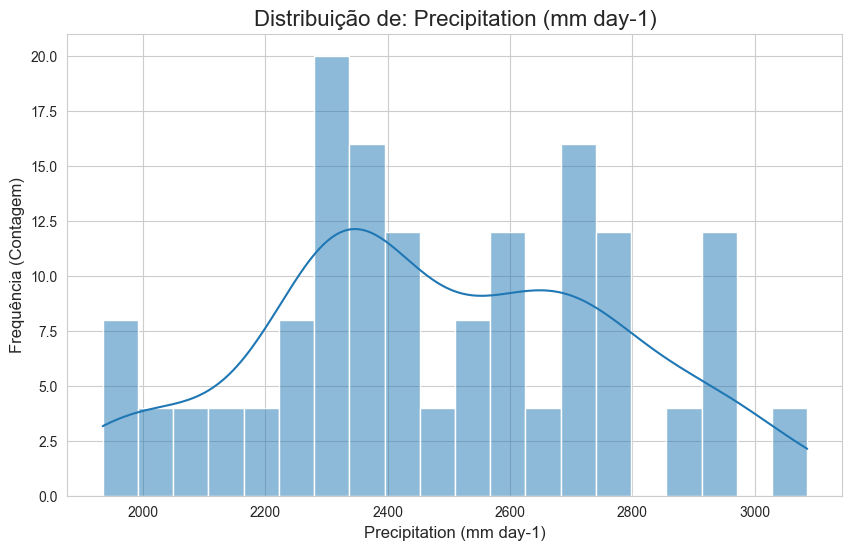

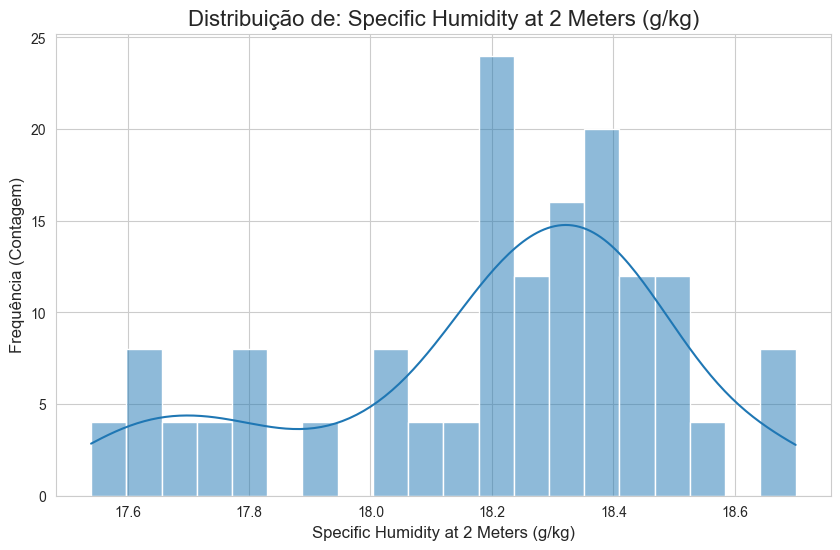

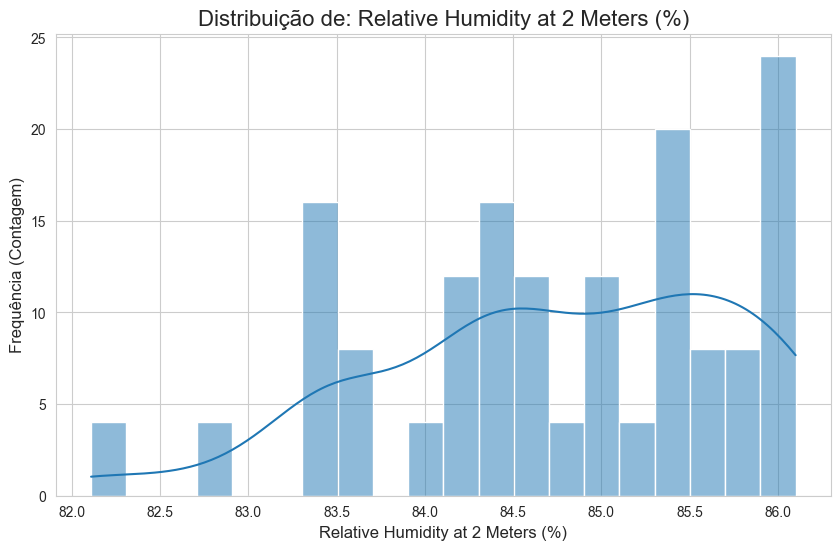

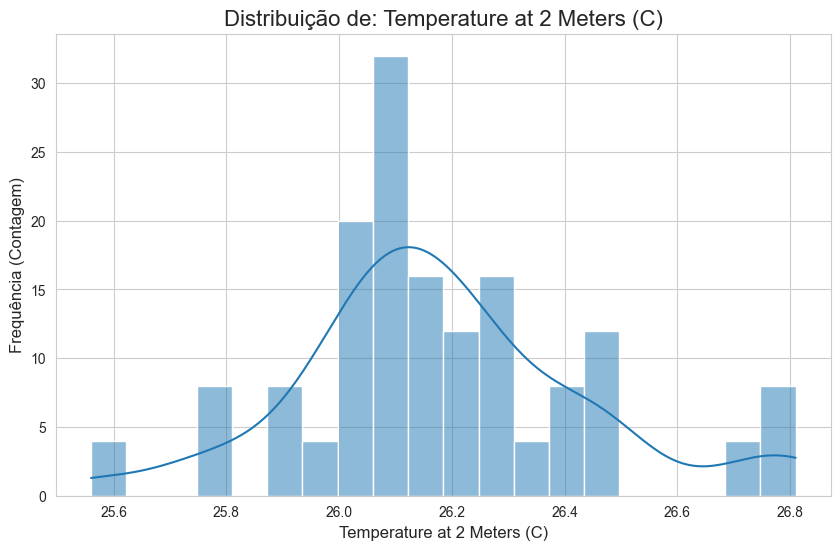

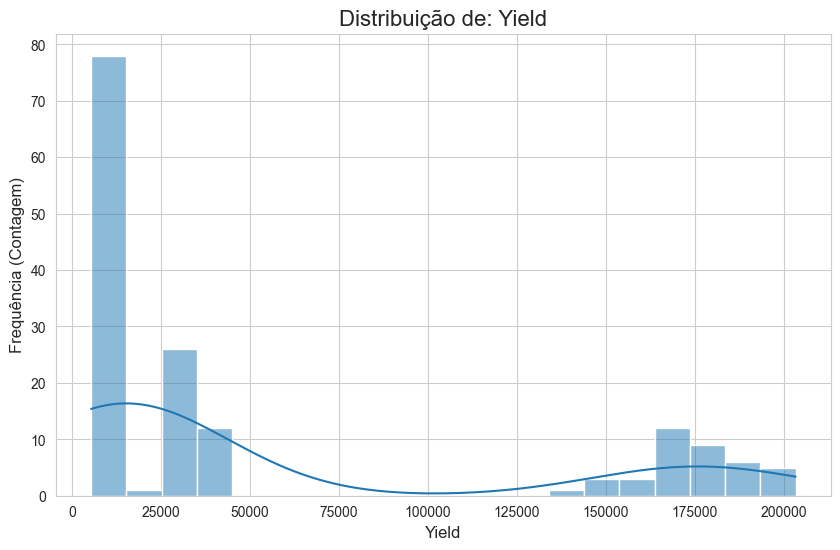

In [44]:
# Célula 4: Visualizando a Distribuição de Cada Variável Numérica

print("Gerando histogramas para cada variável numérica:")

# Primeiro, selecionamos apenas as colunas que são numéricas.
colunas_numericas = df_safra.select_dtypes(include=np.number).columns.tolist()

# Criamos um loop para gerar um gráfico para cada coluna numérica.
for coluna in colunas_numericas:
    plt.figure(figsize=(10, 6)) # Define o tamanho da figura do gráfico
    sns.histplot(data=df_safra, x=coluna, kde=True, bins=20)
    # kde=True adiciona uma linha de densidade para suavizar a forma da distribuição.
    # bins=20 define o número de barras no histograma.
    plt.title(f'Distribuição de: {coluna}', fontsize=16)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel('Frequência (Contagem)', fontsize=12)
    plt.show() # Exibe o gráfico

Gerando boxplots para identificar outliers:


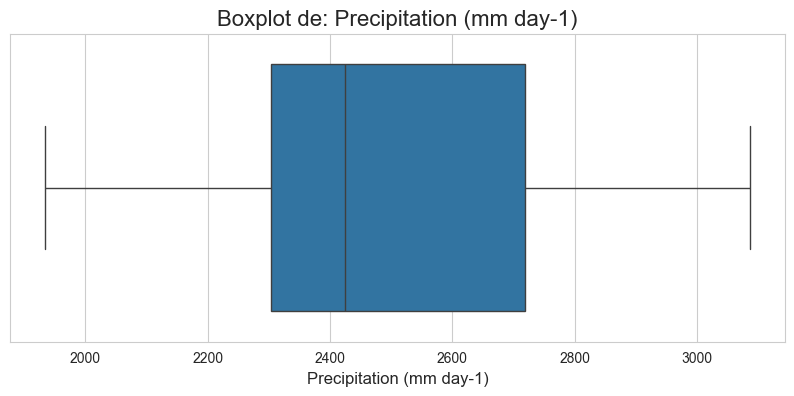

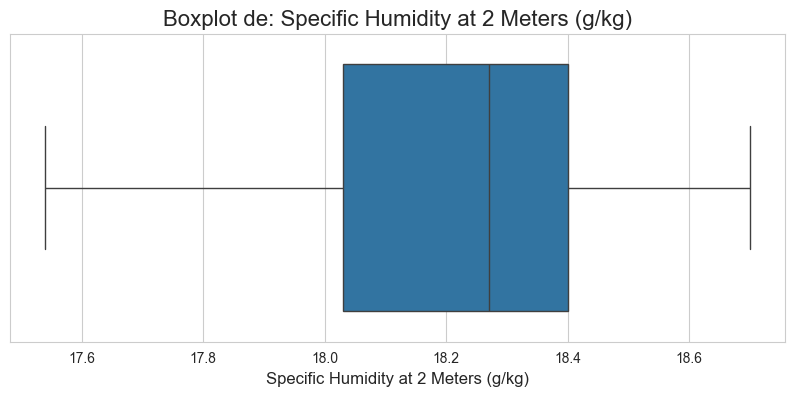

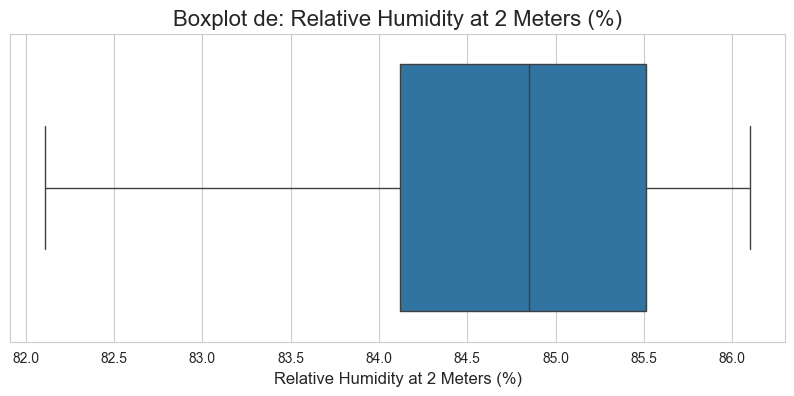

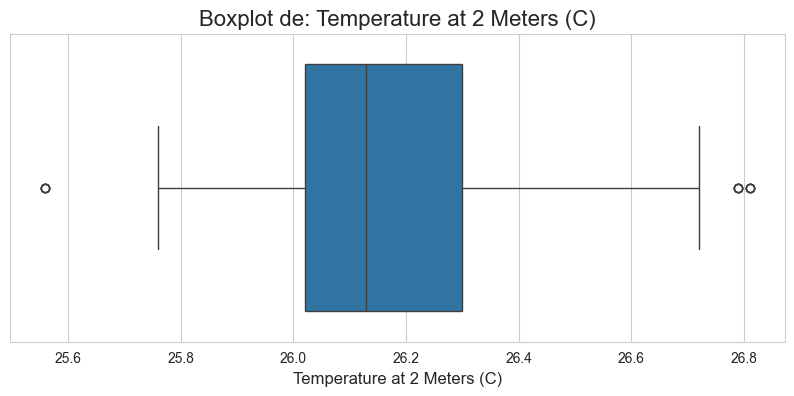

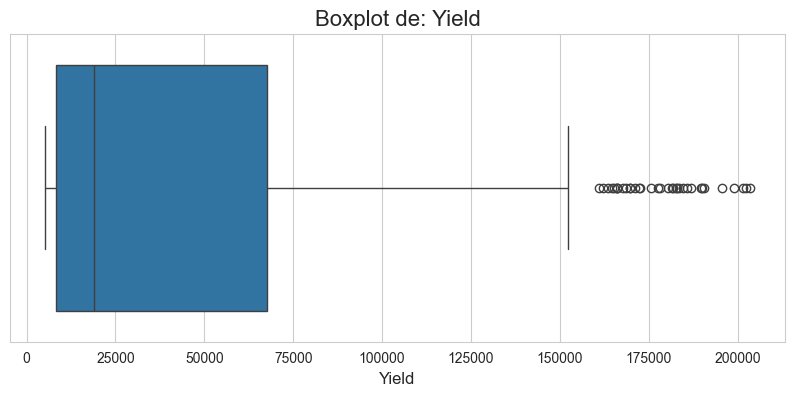

In [45]:
# Célula 5: Identificando Outliers com Boxplots

print("Gerando boxplots para identificar outliers:")

for coluna in colunas_numericas:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df_safra, x=coluna, orient='h') # orient='h' deixa o gráfico na horizontal
    plt.title(f'Boxplot de: {coluna}', fontsize=16)
    plt.xlabel(coluna, fontsize=12)
    plt.show()

Calculando a correlação entre as variáveis numéricas...


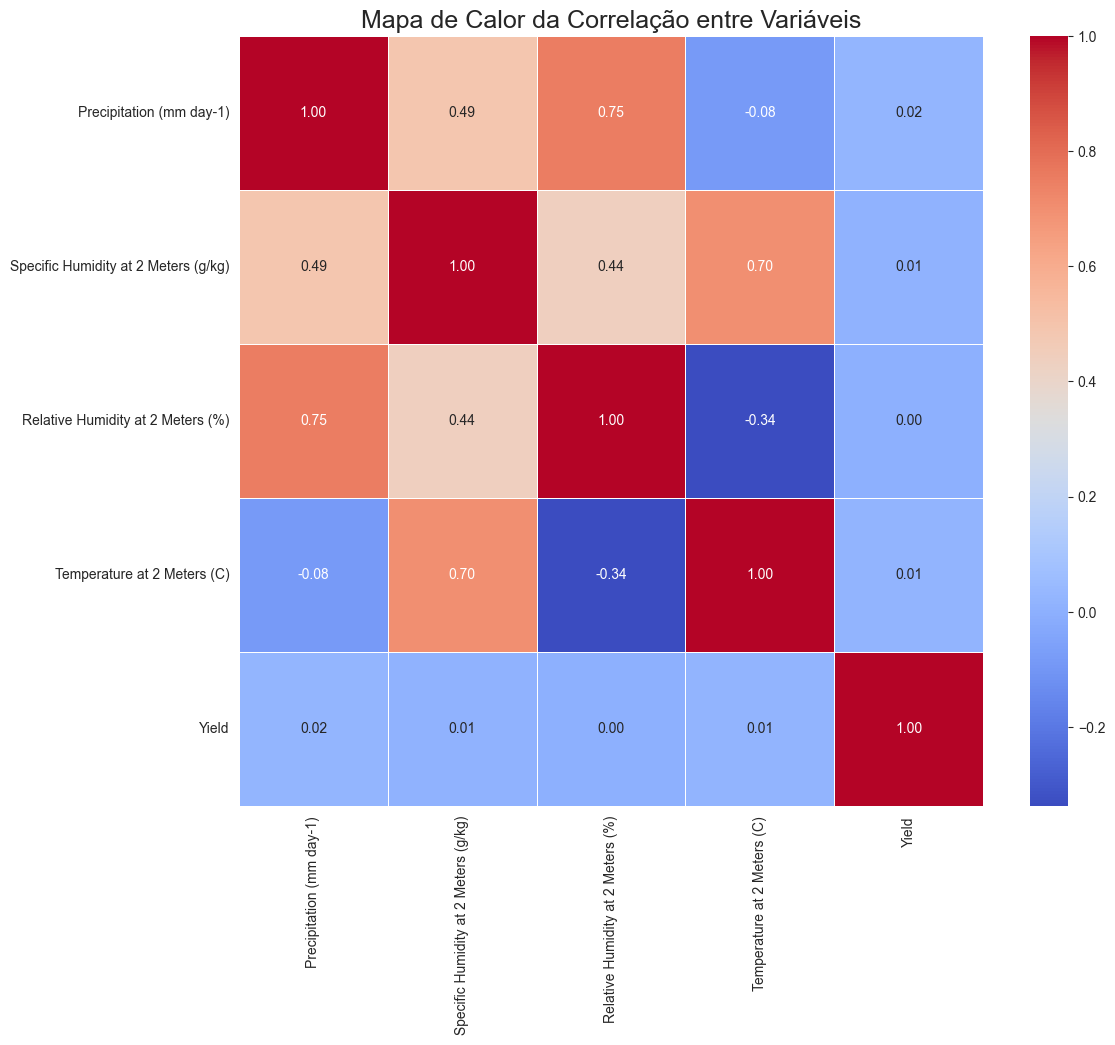

In [46]:
# Célula 6: Matriz de Correlação e Mapa de Calor

print("Calculando a correlação entre as variáveis numéricas...")

# Reutilizamos a lista de colunas numéricas que criamos na aula anterior.
colunas_numericas = df_safra.select_dtypes(include=np.number).columns.tolist()

# Usamos o método .corr() para calcular a matriz de correlação de Pearson.
matriz_correlacao = df_safra[colunas_numericas].corr()

# Agora, vamos criar o mapa de calor para visualizar essa matriz.
plt.figure(figsize=(12, 10))
sns.heatmap(
    matriz_correlacao,
    annot=True,      # annot=True exibe os números de correlação no gráfico.
    cmap='coolwarm', # cmap='coolwarm' usa um esquema de cores intuitivo (vermelho=positivo, azul=negativo).
    fmt='.2f',       # fmt='.2f' formata os números para terem apenas duas casas decimais.
    linewidths=0.5
)
plt.title('Mapa de Calor da Correlação entre Variáveis', fontsize=18)
plt.show()

In [47]:
# Célula 7: Foco na Correlação com a Variável Alvo 'Yield'

# Pegamos a matriz de correlação que já calculamos e selecionamos apenas a coluna 'Yield'.
# Em seguida, usamos .sort_values() para ordenar da maior correlação para a menor.
correlacao_com_yield = matriz_correlacao['Yield'].sort_values(ascending=False)

print("Correlação de cada variável com o Rendimento (Yield):")
print(correlacao_com_yield)

Correlação de cada variável com o Rendimento (Yield):
Yield                                   1.000000
Precipitation (mm day-1)                0.018830
Temperature at 2 Meters (C)             0.013007
Specific Humidity at 2 Meters (g/kg)    0.012651
Relative Humidity at 2 Meters (%)       0.000008
Name: Yield, dtype: float64


In [48]:
# Célula 8: Preparando os Dados para Clusterização

# Importando as ferramentas necessárias da biblioteca Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print("Importando ferramentas de pré-processamento e clusterização.")

# Vamos usar as mesmas colunas numéricas de antes para a clusterização.
# colunas_numericas = df_safra.select_dtypes(include=np.number).columns.tolist()

# Criando uma cópia dos dados numéricos para não alterar o DataFrame original
df_numerico = df_safra[colunas_numericas].copy()

# 1. Inicializar o escalonador
# O StandardScaler transforma os dados para que tenham média 0 e desvio padrão 1.
escalonador = StandardScaler()

# 2. Treinar o escalonador e transformar os dados
df_escalonado = escalonador.fit_transform(df_numerico)

print("\nDados escalonados com sucesso! Amostra dos dados transformados:")
# Vamos exibir as 5 primeiras linhas dos dados após o escalonamento
print(pd.DataFrame(df_escalonado, columns=colunas_numericas).head())

Importando ferramentas de pré-processamento e clusterização.

Dados escalonados com sucesso! Amostra dos dados transformados:
   Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  \
0                 -0.823415                             -1.648845   
1                 -1.899565                             -2.263223   
2                 -0.641042                             -1.341656   
3                  0.366865                             -2.024299   
4                 -0.491386                             -2.024299   

   Relative Humidity at 2 Meters (%)  Temperature at 2 Meters (C)     Yield  
0                          -1.347084                    -0.667109 -0.635267  
1                          -2.646141                    -0.282807 -0.639640  
2                          -1.961367                     0.216786 -0.665240  
3                           0.334641                    -2.396470 -0.667163  
4                          -0.622029                    -1.627865 -0.

In [49]:
# Célula 9: Aplicando o Algoritmo K-Means

# Definimos o número de clusters que queremos encontrar.
# Vamos começar com 4, um número razoável para buscar diferentes "cenários" na fazenda.
NUMERO_DE_CLUSTERS = 4

# 1. Inicializar o modelo K-Means
kmeans = KMeans(n_clusters=NUMERO_DE_CLUSTERS, random_state=42, n_init=10)
# random_state=42 garante que o resultado seja o mesmo toda vez que rodarmos (reprodutibilidade).
# n_init=10 é a configuração padrão e recomendada para estabilidade.

# 2. Treinar o modelo com os dados escalonados
kmeans.fit(df_escalonado)

# 3. Adicionar os rótulos dos clusters de volta ao nosso DataFrame original
df_safra['Cluster'] = kmeans.labels_

print("Clusterização completa! A coluna 'Cluster' foi adicionada ao DataFrame.")
print("\nContagem de registros por cluster:")
print(df_safra['Cluster'].value_counts())

print("\nVisualizando o DataFrame com a nova coluna:")
display(df_safra.head())

Clusterização completa! A coluna 'Cluster' foi adicionada ao DataFrame.

Contagem de registros por cluster:
Cluster
2    51
3    43
1    36
0    26
Name: count, dtype: int64

Visualizando o DataFrame com a nova coluna:


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield,Cluster
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560,3
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253,3
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456,3
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321,3
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800,3


Gerando gráfico de dispersão para visualizar os clusters...


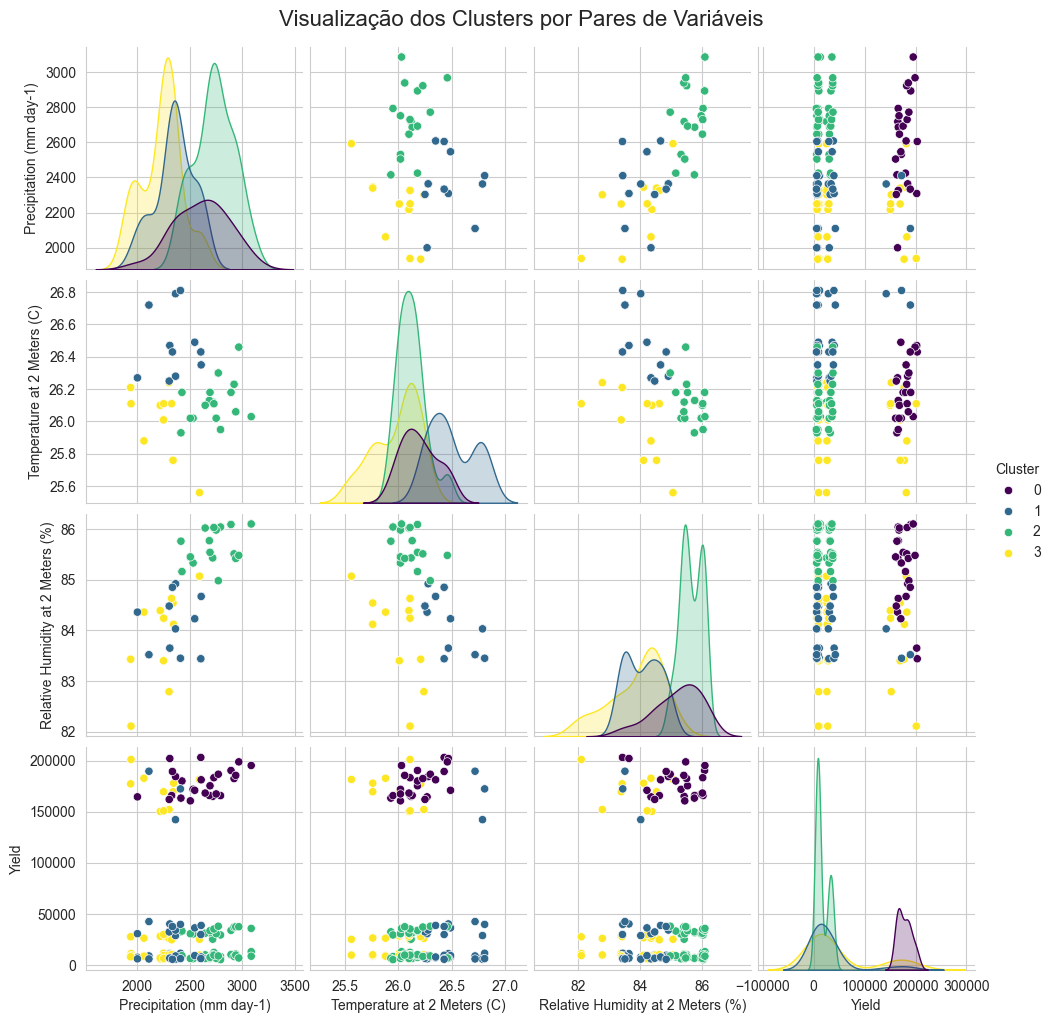

In [50]:
# Célula 10: Visualizando os Clusters

# O pairplot nos permite ver a relação entre pares de variáveis, colorindo por cluster.
# É uma ótima forma de ver como os grupos se separam.
# Vamos selecionar algumas das variáveis mais interessantes para não sobrecarregar o gráfico.
vars_para_plotar = ['Precipitation (mm day-1)', 'Temperature at 2 Meters (C)', 'Relative Humidity at 2 Meters (%)', 'Yield', 'Cluster']

print("Gerando gráfico de dispersão para visualizar os clusters...")
sns.pairplot(df_safra[vars_para_plotar], hue='Cluster', palette='viridis')
plt.suptitle('Visualização dos Clusters por Pares de Variáveis', y=1.02, fontsize=16)
plt.show()

In [51]:
# Célula 11: Separando as Variáveis Preditores (X) e a Variável Alvo (y)

# A coluna 'Cluster' foi útil para a nossa análise, mas não deve ser usada para treinar o modelo
# preditivo, pois ela já é um resultado de um algoritmo de ML. Vamos removê-la.
if 'Cluster' in df_safra.columns:
    df_para_previsao = df_safra.drop('Cluster', axis=1)
else:
    df_para_previsao = df_safra.copy()

# 'y' é o que queremos prever: o Rendimento.
y = df_para_previsao['Yield']

# 'X' é todo o resto, as informações que usaremos para fazer a previsão.
X = df_para_previsao.drop('Yield', axis=1)

print("Variável Alvo (y):")
display(y.head())

print("\nVariáveis Preditores (X):")
display(X.head())

Variável Alvo (y):


0    11560
1    11253
2     9456
3     9321
4     8800
Name: Yield, dtype: int64


Variáveis Preditores (X):


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C)
0,"Cocoa, beans",2248.92,17.72,83.40,26.01
1,"Cocoa, beans",1938.42,17.54,82.11,26.11
2,"Cocoa, beans",2301.54,17.81,82.79,26.24
3,"Cocoa, beans",2592.35,17.61,85.07,25.56
4,"Cocoa, beans",2344.72,17.61,84.12,25.76


In [52]:
# Célula 12: Aplicando One-Hot Encoding na Coluna 'Crop'

# O pandas tem uma função perfeita para isso: get_dummies().
# Ela automaticamente encontra todas as colunas de texto (como 'Crop') e as converte.
X_encoded = pd.get_dummies(X)

print("Dimensões de X antes do encoding:", X.shape)
print("Dimensões de X depois do encoding:", X_encoded.shape)

print("\nVariáveis Preditores (X) após o One-Hot Encoding:")
display(X_encoded.head())

Dimensões de X antes do encoding: (156, 5)
Dimensões de X depois do encoding: (156, 8)

Variáveis Preditores (X) após o One-Hot Encoding:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),"Crop_Cocoa, beans",Crop_Oil palm fruit,"Crop_Rice, paddy","Crop_Rubber, natural"
0,2248.92,17.72,83.40,26.01,True,False,False,False
1,1938.42,17.54,82.11,26.11,True,False,False,False
2,2301.54,17.81,82.79,26.24,True,False,False,False
3,2592.35,17.61,85.07,25.56,True,False,False,False
4,2344.72,17.61,84.12,25.76,True,False,False,False


In [53]:
# Célula 13: Dividindo os Dados em Conjuntos de Treino e Teste

# Importando a função necessária do Scikit-learn
from sklearn.model_selection import train_test_split

# Agora dividimos tanto o X_encoded quanto o y.
# test_size=0.2 significa que 20% dos dados serão para teste e 80% para treino.
# random_state=42 garante que a divisão seja sempre a mesma, para reprodutibilidade.
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print("Divisão concluída com sucesso!")
print("Formato de X_train:", X_train.shape)
print("Formato de X_test:", X_test.shape)
print("Formato de y_train:", y_train.shape)
print("Formato de y_test:", y_test.shape)

Divisão concluída com sucesso!
Formato de X_train: (124, 8)
Formato de X_test: (32, 8)
Formato de y_train: (124,)
Formato de y_test: (32,)


In [54]:
# Célula 16: Engenharia de Feature para o Desafio "Ir Além"

# Encontrando o valor do rendimento que separa os 25% mais baixos.
limite_saude = df_safra['Yield'].quantile(0.25)
print(f"O limite para considerar uma safra 'Não Saudável' é um rendimento abaixo de: {limite_saude:.2f}")

# Criando a nova coluna 'Saude_Planta' (1 para Saudável, 0 para Não Saudável)
# Note que estamos usando o df_safra original para criar o alvo de classificação
y_classificacao = (df_safra['Yield'] >= limite_saude).astype(int)

print("\nDistribuição da nova variável alvo 'Saude_Planta':")
print(y_classificacao.value_counts())

O limite para considerar uma safra 'Não Saudável' é um rendimento abaixo de: 8327.75

Distribuição da nova variável alvo 'Saude_Planta':
Yield
1    117
0     39
Name: count, dtype: int64



--- Resultados da Classificação ---
Acurácia do modelo: 68.75%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         8
           1       0.82      0.75      0.78        24

    accuracy                           0.69        32
   macro avg       0.61      0.62      0.61        32
weighted avg       0.71      0.69      0.70        32


Matriz de Confusão:


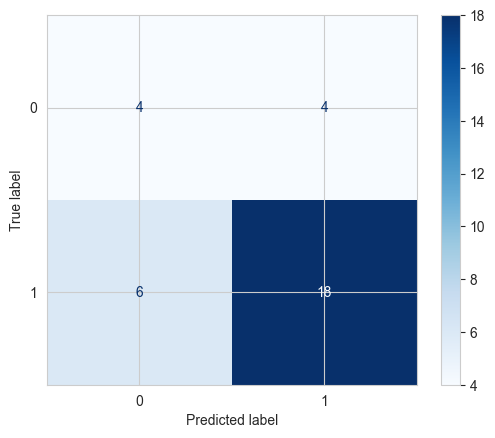

In [55]:
# Célula 17: Modelo de Classificação - Regressão Logística

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Usaremos o mesmo X_encoded da tarefa de regressão. O alvo agora é y_classificacao.
# Precisamos fazer a divisão treino-teste para este novo alvo 'y'.
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_encoded, y_classificacao, test_size=0.2, random_state=42, stratify=y_classificacao
)

# Treinando o modelo
modelo_logistico = LogisticRegression(random_state=42, max_iter=1000)
modelo_logistico.fit(X_train_c, y_train_c)

# Fazendo previsões
previsoes_logistico = modelo_logistico.predict(X_test_c)

# Avaliando o modelo
acuracia = accuracy_score(y_test_c, previsoes_logistico)
print(f"\n--- Resultados da Classificação ---")
print(f"Acurácia do modelo: {acuracia:.2%}")
print("\nRelatório de Classificação:")
print(classification_report(y_test_c, previsoes_logistico))

print("\nMatriz de Confusão:")
ConfusionMatrixDisplay.from_estimator(modelo_logistico, X_test_c, y_test_c, cmap='Blues')
plt.show()

In [57]:
# CÉLULA DE RECUPERAÇÃO: Recriando os resultados da Regressão Linear

print("Recriando as variáveis do modelo linear para a comparação...")

# Importando as ferramentas necessárias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Inicializando e treinando o modelo de Regressão Linear
modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)
previsoes_linear = modelo_linear.predict(X_test)

# ESTAS SÃO AS DUAS LINHAS IMPORTANTES QUE ESTAVAM FALTANDO NA MEMÓRIA:
mae_linear = mean_absolute_error(y_test, previsoes_linear)
r2_linear = r2_score(y_test, previsoes_linear)

print("Variáveis 'mae_linear' e 'r2_linear' recriadas com sucesso na memória!")
print(f"Valores recuperados: MAE={mae_linear:.2f}, R²={r2_linear:.2f}")

Recriando as variáveis do modelo linear para a comparação...
Variáveis 'mae_linear' e 'r2_linear' recriadas com sucesso na memória!
Valores recuperados: MAE=3132.80, R²=1.00


In [58]:
# Célula 18: Modelo 3 - Random Forest (Baseline)

from sklearn.ensemble import RandomForestRegressor

# Lembre-se que X_train e y_train são os dados da nossa tarefa de REGRESSÃO
print("Treinando o modelo Random Forest com configurações padrão...")
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

print("Avaliando o modelo...")
previsoes_rf = modelo_rf.predict(X_test)

# Reutilizando as métricas que já importamos
mae_rf = mean_absolute_error(y_test, previsoes_rf)
r2_rf = r2_score(y_test, previsoes_rf)

print("\n--- Resultados do Random Forest (Padrão) ---")
print(f"Erro Absoluto Médio (MAE): {mae_rf:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_rf:.2f}")

print("\nComparativo com a Regressão Linear:")
print(f"   MAE Linear: {mae_linear:.2f} -> MAE RF: {mae_rf:.2f}")
print(f"   R² Linear: {r2_linear:.2f} -> R² RF: {r2_rf:.2f}")

Treinando o modelo Random Forest com configurações padrão...
Avaliando o modelo...

--- Resultados do Random Forest (Padrão) ---
Erro Absoluto Médio (MAE): 2739.81
Coeficiente de Determinação (R²): 0.99

Comparativo com a Regressão Linear:
   MAE Linear: 3132.80 -> MAE RF: 2739.81
   R² Linear: 1.00 -> R² RF: 0.99


In [59]:
# Célula 19: Otimização de Hiperparâmetros com GridSearchCV

from sklearn.model_selection import GridSearchCV

# 1. Definindo a grade de parâmetros que queremos testar
param_grid = {
    'n_estimators': [100, 200],       # Número de árvores na floresta
    'max_depth': [10, 20, None],      # Profundidade máxima de cada árvore
    'min_samples_split': [2, 5],      # Mínimo de amostras para poder dividir um galho
    'min_samples_leaf': [1, 2]        # Mínimo de amostras que deve existir em uma folha final
}

# 2. Inicializando o GridSearchCV
# estimator: o modelo que queremos otimizar
# param_grid: a grade de parâmetros que definimos
# cv=3: usa validação cruzada com 3 "dobras" para evitar sorte/azar na escolha dos dados
# n_jobs=-1: usa todos os núcleos do seu processador para acelerar o processo
# verbose=2: mostra mensagens de progresso durante a execução
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# 3. Executando a busca (esta é a parte demorada)
print("Iniciando a busca pelos melhores hiperparâmetros... Isso pode levar alguns minutos.")
grid_search.fit(X_train, y_train)

# 4. Exibindo os melhores parâmetros encontrados
print(f"\nMelhores parâmetros encontrados: {grid_search.best_params_}")

# 5. Avaliando o melhor modelo encontrado pela busca
melhor_modelo_rf = grid_search.best_estimator_
previsoes_rf_otimizado = melhor_modelo_rf.predict(X_test)

mae_rf_otimizado = mean_absolute_error(y_test, previsoes_rf_otimizado)
r2_rf_otimizado = r2_score(y_test, previsoes_rf_otimizado)

print("\n--- Resultados do Random Forest (OTIMIZADO) ---")
print(f"Erro Absoluto Médio (MAE): {mae_rf_otimizado:.2f}")
print(f"Coeficiente de Determinação (R²): {r2_rf_otimizado:.2f}")

print("\nComparativo com o RF Padrão:")
print(f"   MAE Padrão: {mae_rf:.2f} -> MAE Otimizado: {mae_rf_otimizado:.2f}")
print(f"   R² Padrão: {r2_rf:.2f} -> R² Otimizado: {r2_rf_otimizado:.2f}")

Iniciando a busca pelos melhores hiperparâmetros... Isso pode levar alguns minutos.
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Melhores parâmetros encontrados: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

--- Resultados do Random Forest (OTIMIZADO) ---
Erro Absoluto Médio (MAE): 2739.81
Coeficiente de Determinação (R²): 0.99

Comparativo com o RF Padrão:
   MAE Padrão: 2739.81 -> MAE Otimizado: 2739.81
   R² Padrão: 0.99 -> R² Otimizado: 0.99


In [60]:
# Célula 20: Construindo um Pipeline Profissional

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Relembrar qual era o nosso X original (antes do get_dummies)
# Ele tem a coluna 'Crop' como texto, o que é perfeito para o pipeline.
# A variável 'X' já deve existir na memória da Aula 6.

# 2. Definir o pré-processador.
# Ele tem uma única instrução: aplicar o OneHotEncoder na coluna 'Crop'.
# O 'remainder="passthrough"' garante que as outras colunas (numéricas) não sejam alteradas.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Crop'])
    ],
    remainder='passthrough'
)

# 3. Reutilizar o melhor modelo que o GridSearchCV encontrou
# A variável 'melhor_modelo_rf' foi criada na célula anterior
# e já contém o Random Forest com os parâmetros otimizados.

# 4. Montar o Pipeline!
# O pipeline tem dois passos: 'preprocessor' e 'regressor'.
pipeline_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', melhor_modelo_rf)
])

# 5. Treinar o pipeline inteiro
# Usaremos os dados originais X e y para a divisão, pois o pipeline cuidará do encoding.
X_original_train, X_original_test, y_train_p, y_test_p = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Treinando o pipeline final de ponta a ponta...")
pipeline_final.fit(X_original_train, y_train_p)
print("Pipeline treinado com sucesso!")

# 6. Avaliar a performance do pipeline
score_pipeline = pipeline_final.score(X_original_test, y_test_p)
print(f"\nScore R² do Pipeline no conjunto de teste: {score_pipeline:.2f}")

Treinando o pipeline final de ponta a ponta...
Pipeline treinado com sucesso!

Score R² do Pipeline no conjunto de teste: 0.99


In [61]:
# Célula 21: Salvando o Modelo para Produção

import joblib

# Definindo o nome do arquivo que guardará toda a nossa inteligência
nome_arquivo_modelo = 'modelo_previsao_safra.joblib'

# Usando joblib para salvar nosso objeto 'pipeline_final' em um arquivo
joblib.dump(pipeline_final, nome_arquivo_modelo)

print(f"Pipeline final salvo com sucesso no arquivo: '{nome_arquivo_modelo}'")
print("Este arquivo agora contém o pré-processador e o modelo treinado.")

print("\n--- TESTE DE CARREGAMENTO E PREVISÃO ---")
# Agora, vamos simular que estamos em outro programa, carregando o modelo do zero.
modelo_carregado = joblib.load(nome_arquivo_modelo)
print("Modelo carregado de volta do arquivo!")

# Vamos criar um DataFrame com dados de um novo cenário hipotético
dados_novos = pd.DataFrame({
    'Crop': ['Rice, paddy'],
    'Precipitation (mm day-1)': [2800],
    'Specific Humidity at 2 Meters (g/kg)': [18.5],
    'Relative Humidity at 2 Meters (%)': [86.0],
    'Temperature at 2 Meters (C)': [26.5]
})
print("\nDados do novo cenário para prever:")
display(dados_novos)

# Usando o modelo carregado para prever o resultado
previsao_exemplo = modelo_carregado.predict(dados_novos)
print(f"\n>> Previsão de rendimento para o novo cenário: {previsao_exemplo[0]:.2f} toneladas/hectare")

Pipeline final salvo com sucesso no arquivo: 'modelo_previsao_safra.joblib'
Este arquivo agora contém o pré-processador e o modelo treinado.

--- TESTE DE CARREGAMENTO E PREVISÃO ---
Modelo carregado de volta do arquivo!

Dados do novo cenário para prever:


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C)
0,"Rice, paddy",2800,18.5,86.0,26.5



>> Previsão de rendimento para o novo cenário: 35903.38 toneladas/hectare
